# Best LSTM found on hourly data (2017)

In [1]:
%run /Users/renero/Documents/SideProjects/sailboatsfactory/notebooks/experimental/data.py
%run /Users/renero/Documents/SideProjects/sailboatsfactory/notebooks/experimental/compute.py
%run /Users/renero/Documents/SideProjects/sailboatsfactory/notebooks/experimental/lstm.py
%run /Users/renero/Documents/SideProjects/sailboatsfactory/notebooks/experimental/parameters.py
%run /Users/renero/Documents/SideProjects/sailboatsfactory/notebooks/experimental/plot.py

Using TensorFlow backend.


New nr of test cases: 18
Adjusted training shape: 2289 (discard 4 samples)
1st layer return sequence: False
Adding layer #1 [1024]


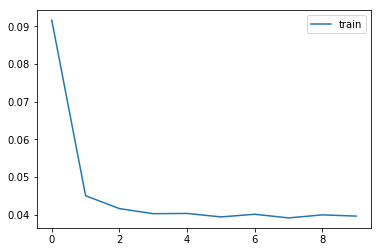

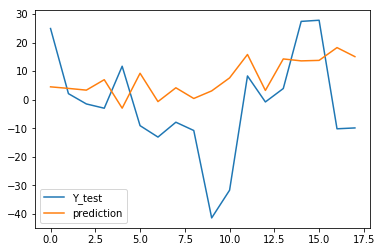

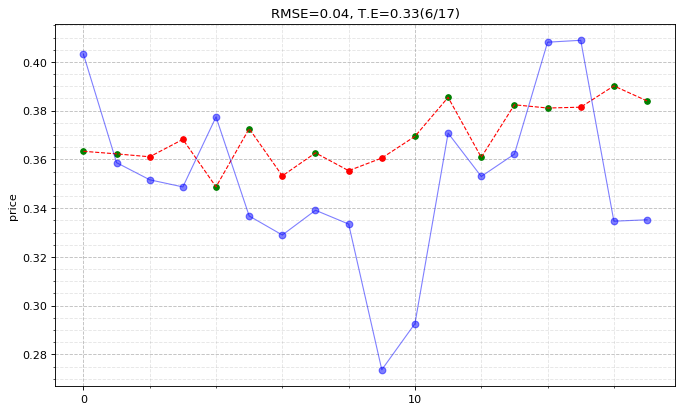

In [2]:
from numpy.random import seed
from tensorflow import set_random_seed

import compute
import data
import lstm
import parameters
import plot


# Initialization of seeds
set_random_seed(2)
seed(2)

# Read the parameters, dataset and then adjust everything
# to produce the training and test sets with the correct
# batch size splits.
params = parameters.read()
raw = data.read(params)
print('Original dataset num samples:', raw.shape)
adjusted = parameters.adjust(raw, params)
X_train, Y_train, X_test, Y_test = data.prepare(adjusted, params)

# Build the model and train it.
model = lstm.build(params)
train_loss = model.fit(
                     X_train, Y_train,
                     shuffle=params['lstm_shuffle'],
                     batch_size=params['lstm_batch_size'],
                     epochs=params['lstm_num_epochs'])
plot.history(train_loss)

# Plot the test values for Y, and Y_hat, without scaling (inverted)
Y_hat = model.predict(X_test, batch_size=params['lstm_batch_size'])
plot.curves(params['y_scaler'].inverse_transform(Y_test),
            params['y_scaler'].inverse_transform(Y_hat),
            labels=['Y_test', 'prediction'])

# Compute the error and plot the predictions.
rmse, trend_error = compute.error(Y_test, Y_hat)
plot.prediction(Y_test, Y_hat,
                title='RMSE={:.02f}, T.E={:.02f}({:d}/{:d})'.
                format(rmse,
                       (trend_error/(len(Y_test))),
                       trend_error, len(Y_test) - 1))